In [2]:
import pandas as pd

In [3]:
demographics = pd.read_csv('../data/climate-ready-social-data.csv')

In [16]:
demographics.head()
# print(list(demographics.columns))

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [49]:
demographics[demographics['Name'] == 'Allston']

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
7,8,25025000703,1916064.65,43.9868,2791,1418,99,31,31,1740,1771,1083,1029.60,Allston,326153.742188,3052.866729
9,10,25025000704,2580833.98,59.2478,4801,2405,301,142,113,1560,1673,1928,1802.25,Allston,439292.992188,2870.108353


In [21]:
# Check for missing values
print(demographics.isnull().sum())

FID              0
GEOID10          0
AREA_SQFT        0
AREA_ACRES       0
POP100_RE        0
HU100_RE         0
TotDis           0
TotChild         0
OlderAdult       0
Low_to_No        0
LEP              0
POC2             0
MedIllnes        0
Name             0
Shape__Area      0
Shape__Length    0
dtype: int64


In [30]:
name_counts = demographics['Name'].value_counts()
print(name_counts)

Roxbury                    23
Dorchester                 19
Roslindale                 18
Jamaica Plain              15
East Boston                14
Brighton                   14
Back Bay                   11
Mattapan                    8
South Boston                7
Charlestown                 6
Fenway                      6
North End                   6
South End                   5
Mission Hill                5
West Roxbury                5
Hyde Park                   4
West End                    3
South Boston Waterfront     3
Bay Village                 3
Allston                     2
Longwood Medical Area       1
Leather District            1
Harbor Islands              1
Name: Name, dtype: int64


- Roxbury has the highest demographics, followed by Dorchester, Roslindale, Jamaica Plain, East Boston and so on.

# Individual analysis w.r.t the neighborhood

## (1) Total population based on the neighborhood

In [51]:
max_population = demographics.groupby('Name')['POP100_RE'].sum().reset_index()
max_population = max_population.rename(columns={'POP100_RE': 'Total Population'}).set_index('Name')
print(max_population)

                         Total Population
Name                                     
Allston                              7592
Back Bay                            28634
Bay Village                         10850
Brighton                            60821
Charlestown                         16439
Dorchester                          69695
East Boston                         40517
Fenway                              27138
Harbor Islands                        535
Hyde Park                           16585
Jamaica Plain                       42251
Leather District                     5902
Longwood Medical Area                4861
Mattapan                            33103
Mission Hill                        22576
North End                           16880
Roslindale                          60973
Roxbury                             77812
South Boston                        22067
South Boston Waterfront              6135
South End                           16432
West End                          

## (2) Total Housing based on the neighborhood

In [52]:
max_housing = demographics.groupby('Name')['HU100_RE'].sum().reset_index()
max_housing = max_housing.rename(columns={'HU100_RE': 'Total Housing'}).set_index('Name')
print(max_housing)

                         Total Housing
Name                                  
Allston                           3823
Back Bay                         18365
Bay Village                       5076
Brighton                         27143
Charlestown                       8648
Dorchester                       27507
East Boston                      15857
Fenway                            9243
Harbor Islands                       0
Hyde Park                         6592
Jamaica Plain                    18844
Leather District                  3383
Longwood Medical Area              416
Mattapan                         13517
Mission Hill                      6923
North End                        10602
Roslindale                       25153
Roxbury                          32887
South Boston                     11059
South Boston Waterfront           3472
South End                         9181
West End                          4613
West Roxbury                     10180


## (3) Total Children based on the neighborhood

In [44]:
max_children = demographics.groupby('Name')['TotChild'].sum().reset_index()
max_children = max_children.rename(columns={'TotChild': 'Total children'}).set_index('Name')
print(max_children)


                         Total children
Name                                   
Allston                             173
Back Bay                           1686
Bay Village                        1249
Brighton                           4244
Charlestown                        3301
Dorchester                        17424
East Boston                        8665
Fenway                              453
Harbor Islands                        0
Hyde Park                          3256
Jamaica Plain                      7300
Leather District                    465
Longwood Medical Area               118
Mattapan                           8859
Mission Hill                       1973
North End                          1028
Roslindale                        13324
Roxbury                           19517
South Boston                       3455
South Boston Waterfront             392
South End                          2552
West End                            467
West Roxbury                       4758


## (4) Total Disability based on the neighborhood

In [45]:
max_disability = demographics.groupby('Name')['TotDis'].sum().reset_index()
max_disability = max_disability.rename(columns={'TotDis': 'Total disability'}).set_index('Name')
print(max_disability)

                         Total disability
Name                                     
Allston                               400
Back Bay                             1892
Bay Village                          1122
Brighton                             5502
Charlestown                          1535
Dorchester                           9819
East Boston                          5180
Fenway                               1240
Harbor Islands                        179
Hyde Park                            2117
Jamaica Plain                        4570
Leather District                      457
Longwood Medical Area                 207
Mattapan                             5605
Mission Hill                         2215
North End                            1338
Roslindale                           7286
Roxbury                             12611
South Boston                         2143
South Boston Waterfront               357
South End                            1874
West End                          

## (5) Total Older Adults based on the neighborhood

In [46]:
max_adult = demographics.groupby('Name')['OlderAdult'].sum().reset_index()
max_adult = max_adult.rename(columns={'OlderAdult': 'Total Older adults'}).set_index('Name')
print(max_adult)

                         Total Older adults
Name                                       
Allston                                 144
Back Bay                               3759
Bay Village                            1711
Brighton                               5847
Charlestown                            1811
Dorchester                             6535
East Boston                            4147
Fenway                                  496
Harbor Islands                           12
Hyde Park                              2219
Jamaica Plain                          4381
Leather District                        812
Longwood Medical Area                    11
Mattapan                               4073
Mission Hill                           1525
North End                              2122
Roslindale                             8231
Roxbury                                6675
South Boston                           2395
South Boston Waterfront                 456
South End                       

## (6) Total Low to No Income based on the neighborhood

In [48]:
max_low_income = demographics.groupby('Name')['Low_to_No'].sum().reset_index()
max_low_income = max_low_income.rename(columns={'Low_to_No': 'Total Low Income'}).set_index('Name')
print(max_low_income)

                         Total Low Income
Name                                     
Allston                              3300
Back Bay                             5316
Bay Village                          3929
Brighton                            17067
Charlestown                          4157
Dorchester                          22749
East Boston                         13698
Fenway                               6681
Harbor Islands                        349
Hyde Park                            2683
Jamaica Plain                       12985
Leather District                     1253
Longwood Medical Area                 186
Mattapan                             9531
Mission Hill                         8869
North End                            3155
Roslindale                          11249
Roxbury                             33272
South Boston                         5491
South Boston Waterfront               601
South End                            4504
West End                          

## (7) Total Medical Illness based on the neighborhood

In [58]:
max_medical_illness = demographics.groupby('Name')['MedIllnes'].sum().reset_index()
max_medical_illness = max_medical_illness.rename(columns={'MedIllnes': 'Total Medical Illness'}).set_index('Name')
print(max_medical_illness)

                         Total Medical Illness
Name                                          
Allston                                2831.85
Back Bay                              11842.96
Bay Village                            4292.93
Brighton                              23936.80
Charlestown                            6461.47
Dorchester                            25010.76
East Boston                           14824.60
Fenway                                10080.74
Harbor Islands                          230.53
Hyde Park                              6412.46
Jamaica Plain                         16600.57
Leather District                       2397.59
Longwood Medical Area                  1824.08
Mattapan                              12396.87
Mission Hill                           8467.93
North End                              7217.86
Roslindale                            24029.32
Roxbury                               28235.10
South Boston                           8925.16
South Boston 

# Combined analysis of all the important features w.r.t the neighborhood

In [92]:
combined_df = demographics.groupby('Name')[['POP100_RE', 'HU100_RE', 'TotChild', 'TotDis', 'OlderAdult', 'Low_to_No', 'MedIllnes']].sum().reset_index()
combined_df = combined_df.rename(columns={'POP100_RE': 'Total Population', 'HU100_RE': 'Total Housing', 'TotChild': 'Total Children', 'TotDis': 'Total Disability', 'OlderAdult': 'Total Older adults', 'Low_to_No': 'Total Low Income', 'MedIllnes': 'Total Medical Illness'})
combined_df

,Name,Total Population,Total Housing,Total Children,Total Disability,Total Older adults,Total Low Income,Total Medical Illness
0,Allston,7592,3823,173,400,144,3300,2831.85
1,Back Bay,28634,18365,1686,1892,3759,5316,11842.96
2,Bay Village,10850,5076,1249,1122,1711,3929,4292.93
3,Brighton,60821,27143,4244,5502,5847,17067,23936.80
4,Charlestown,16439,8648,3301,1535,1811,4157,6461.47
5,Dorchester,69695,27507,17424,9819,6535,22749,25010.76
6,East Boston,40517,15857,8665,5180,4147,13698,14824.60
7,Fenway,27138,9243,453,1240,496,6681,10080.74
8,Harbor Islands,535,0,0,179,12,349,230.53
9,Hyde Park,16585,6592,3256,2117,2219,2683,6412.46


## (1) Percentage of Total population vs Neighborhood

In [117]:
population_df = combined_df.sort_values('Total Population', ascending = False)

total_population = combined_df['Total Population'].sum()

population_df['Percentage'] = (population_df['Total Population'] / total_population) * 100

population_df[['Name', 'Total Population', 'Percentage']].head()


,Name,Total Population,Percentage
17,Roxbury,77812,12.599032
5,Dorchester,69695,11.284757
16,Roslindale,60973,9.872523
3,Brighton,60821,9.847912
10,Jamaica Plain,42251,6.841126


- 12.5% of the entire boston population live in neighborhood: Roxbury
- 11% of the entire boston population live in neighborhood: Dorchester
- 10% of the entire boston population live in neighborhood: Roslindale
- 10% of the entire boston population live in neighborhood: Brighton
- 7% of the entire boston population live in neighborhood: Jamaica Plain

## (2) Percentage of Total Housing vs Neighborhood

In [129]:
housing_df = combined_df.sort_values('Total Housing', ascending = False)

total_housing = combined_df['Total Housing'].sum()

housing_df['Percentage'] = (housing_df['Total Housing'] / total_housing) * 100

housing_df[['Name', 'Total Housing', 'Percentage']].head()


,Name,Total Housing,Percentage
17,Roxbury,32887,12.069333
5,Dorchester,27507,10.094905
3,Brighton,27143,9.961319
16,Roslindale,25153,9.231001
10,Jamaica Plain,18844,6.915635


- 12% of the entire housing is in neighborhood: Roxbury
- 10% of the entire housing is in neighborhood: Dorchester
- 10% of the entire housing is in neighborhood: Brighton
- 9% of the entire housing is in neighborhood: Roslindale
- 7% of the entire housing is in neighborhood: Jamaica Plain

## (3) Percentage of Total Low Income vs Neighborhood

In [130]:
combined_df.sort_values('Total Low Income', ascending = False)[['Name', 'Total Low Income']].head()

low_income_df = combined_df.sort_values('Total Low Income', ascending = False)

total_low_income = combined_df['Total Low Income'].sum()

low_income_df['Percentage'] = (low_income_df['Total Low Income'] / total_low_income) * 100

low_income_df[['Name', 'Total Low Income', 'Percentage']].head()


,Name,Total Low Income,Percentage
17,Roxbury,33272,18.898210
5,Dorchester,22749,12.921237
3,Brighton,17067,9.693909
6,East Boston,13698,7.780346
10,Jamaica Plain,12985,7.375368


- 19% of the people who has low to no income live in neighborhood: Roxbury
- 13% of the people who has low to no income live in neighborhood: Dorchester
- 10% of the people who has low to no income live in neighborhood: Brighton
- 8% of the people who has low to no income live in neighborhood: East Boston
- 7% of the people who has low to no income live in neighborhood: Jamaica Plain

## (4) Percentage of Total Disability vs Neighborhood

In [131]:
disability_df = combined_df.sort_values('Total Disability', ascending = False)

total_disability = combined_df['Total Disability'].sum()

disability_df['Percentage'] = (disability_df['Total Disability'] / total_disability) * 100

disability_df[['Name', 'Total Disability', 'Percentage']].head()


,Name,Total Disability,Percentage
17,Roxbury,12611,17.837089
5,Dorchester,9819,13.888064
16,Roslindale,7286,10.305371
13,Mattapan,5605,7.927752
3,Brighton,5502,7.782068


- 19% of the people who has some disability live in neighborhood: Roxbury
- 13% of the people who has some disability live in neighborhood: Dorchester
- 10% of the people who has some disability live in neighborhood: Roslindale
- 8% of the people who has some disability live in neighborhood: Mattapan
- 7% of the people who has some disability live in neighborhood: Brighton

## (5) Percentage of Total Children vs Neighborhood

In [132]:
children_df = combined_df.sort_values('Total Children', ascending = False)

total_children = combined_df['Total Children'].sum()

children_df['Percentage'] = (children_df['Total Older adults'] / total_children) * 100

children_df[['Name', 'Total Children', 'Percentage']].head()


,Name,Total Children,Percentage
17,Roxbury,19517,6.377856
5,Dorchester,17424,6.244088
16,Roslindale,13324,7.864589
13,Mattapan,8859,3.891686
6,East Boston,8665,3.962392


- 6% of the children live in neighborhood: Roxbury
- 6% of the children live in neighborhood: Dorchester
- 8% of the children live in neighborhood: Brighton
- 4% of the children live in neighborhood: East Boston
- 4% of the children live in neighborhood: Jamaica Plain

In [133]:
adult_df = combined_df.sort_values('Total Older adults', ascending=False)

total_adults = combined_df['Total Older adults'].sum()

adult_df['Percentage'] = (adult_df['Total Older adults'] / total_adults) * 100

adult_df[['Name', 'Total Older adults', 'Percentage']].head()


,Name,Total Older adults,Percentage
16,Roslindale,8231,13.026414
17,Roxbury,6675,10.563882
5,Dorchester,6535,10.342317
3,Brighton,5847,9.253486
10,Jamaica Plain,4381,6.933388


- 13% of the older adults live in neighborhood: Roxbury
- 11% of the older adults live in neighborhood: Dorchester
- 10% of the older adults live in neighborhood: Brighton
- 9% of the older adults live in neighborhood: East Boston
- 7% of the older adults live in neighborhood: Jamaica Plain

# Visualization of the same is as follows

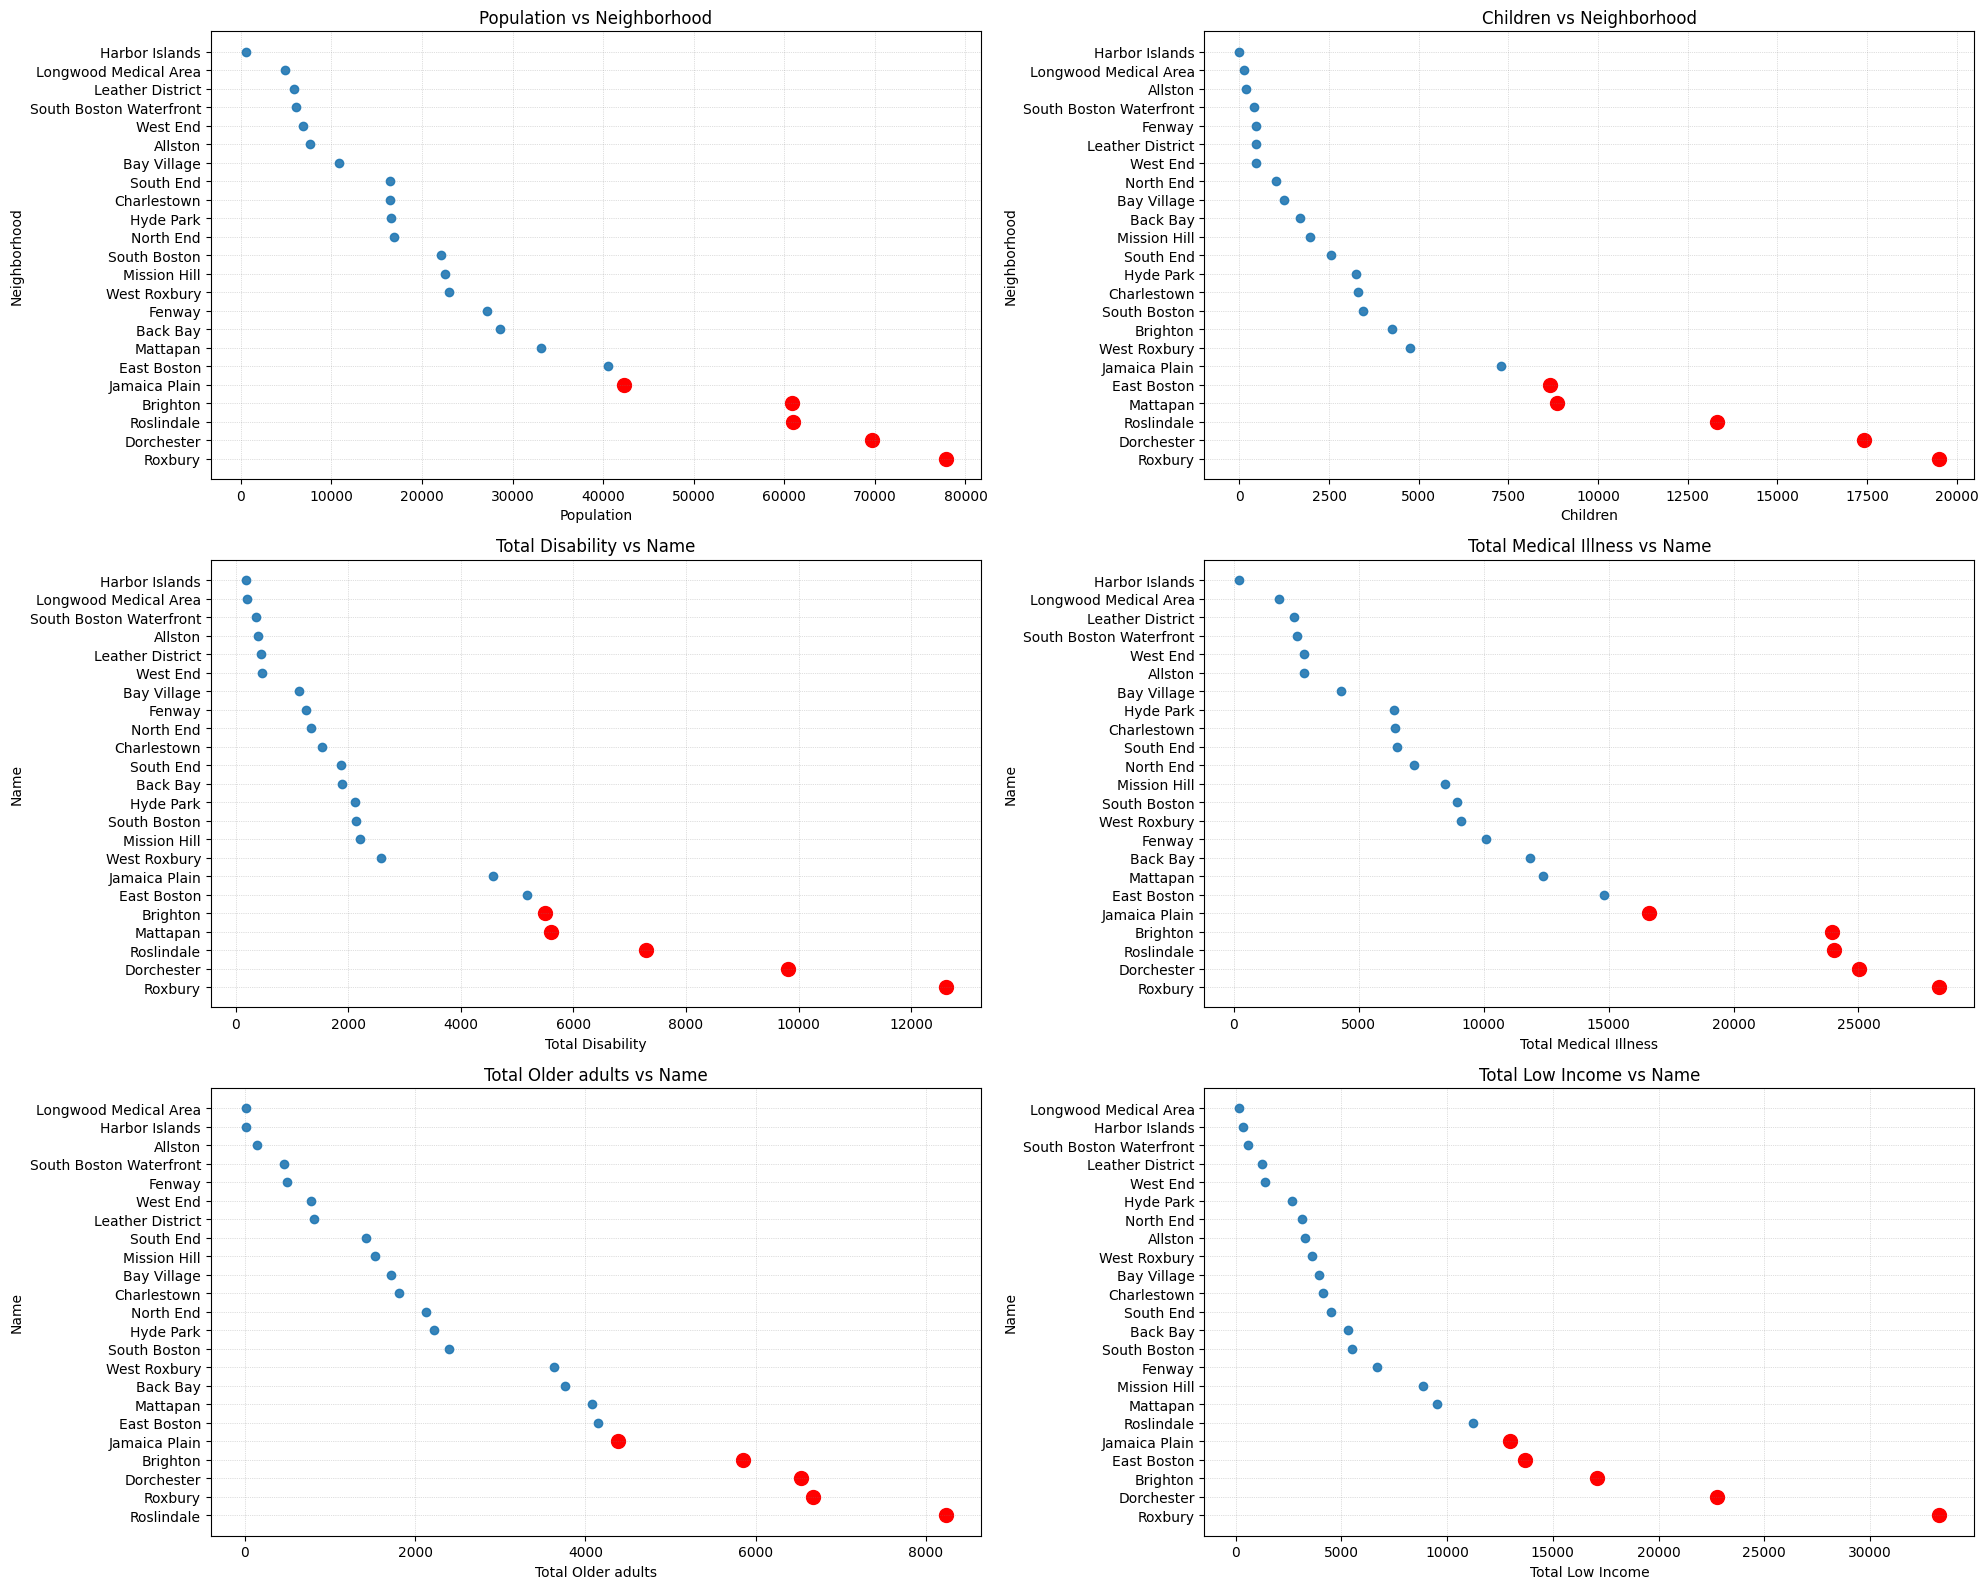

In [144]:
import matplotlib.pyplot as plt

# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

# First row of subplots
combined_df_sorted = combined_df.sort_values('Total Population', ascending=False)
axs[0, 0].scatter(combined_df_sorted['Total Population'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[0, 0].scatter(top_5['Total Population'], top_5['Name'], color='red', marker='o', s=100)
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Neighborhood')
axs[0, 0].set_title('Population vs Neighborhood')
axs[0, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

combined_df_sorted = combined_df.sort_values('Total Children', ascending=False)
axs[0, 1].scatter(combined_df_sorted['Total Children'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[0, 1].scatter(top_5['Total Children'], top_5['Name'], color='red', marker='o', s=100)
axs[0, 1].set_xlabel('Children')
axs[0, 1].set_ylabel('Neighborhood')
axs[0, 1].set_title('Children vs Neighborhood')
axs[0, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Disability', ascending=False)
axs[1, 0].scatter(combined_df_sorted['Total Disability'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[1, 0].scatter(top_5['Total Disability'], top_5['Name'], color='red', marker='o', s=100)
axs[1, 0].set_xlabel('Total Disability')
axs[1, 0].set_ylabel('Name')
axs[1, 0].set_title('Total Disability vs Name')
axs[1, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

combined_df_sorted = combined_df.sort_values('Total Medical Illness', ascending=False)
axs[1, 1].scatter(combined_df_sorted['Total Medical Illness'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[1, 1].scatter(top_5['Total Medical Illness'], top_5['Name'], color='red', marker='o', s=100)
axs[1, 1].set_xlabel('Total Medical Illness')
axs[1, 1].set_ylabel('Name')
axs[1, 1].set_title('Total Medical Illness vs Name')
axs[1, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Older adults', ascending=False)
axs[2, 0].scatter(combined_df_sorted['Total Older adults'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[2, 0].scatter(top_5['Total Older adults'], top_5['Name'], color='red', marker='o', s=100)
axs[2, 0].set_xlabel('Total Older adults')
axs[2, 0].set_ylabel('Name')
axs[2, 0].set_title('Total Older adults vs Name')
axs[2, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Low Income', ascending=False)
axs[2, 1].scatter(combined_df_sorted['Total Low Income'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[2, 1].scatter(top_5['Total Low Income'], top_5['Name'], color='red', marker='o', s=100)
axs[2, 1].set_xlabel('Total Low Income')
axs[2, 1].set_ylabel('Name')
axs[2, 1].set_title('Total Low Income vs Name')
axs[2, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

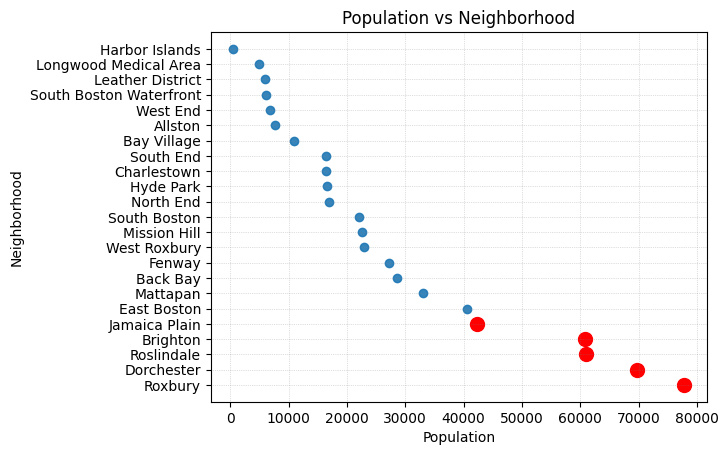

In [123]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Population', ascending=False)

plt.scatter(combined_df_sorted['Total Population'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Population'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population vs Neighborhood')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


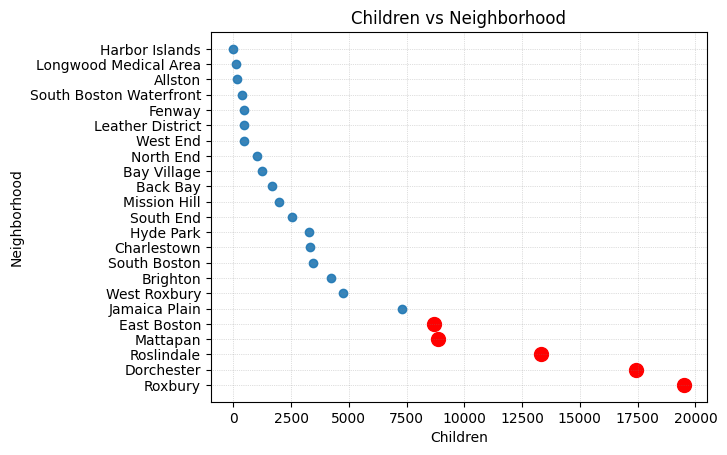

In [124]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Children', ascending=False)

plt.scatter(combined_df_sorted['Total Children'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Children'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Children')
plt.ylabel('Neighborhood')
plt.title('Children vs Neighborhood')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


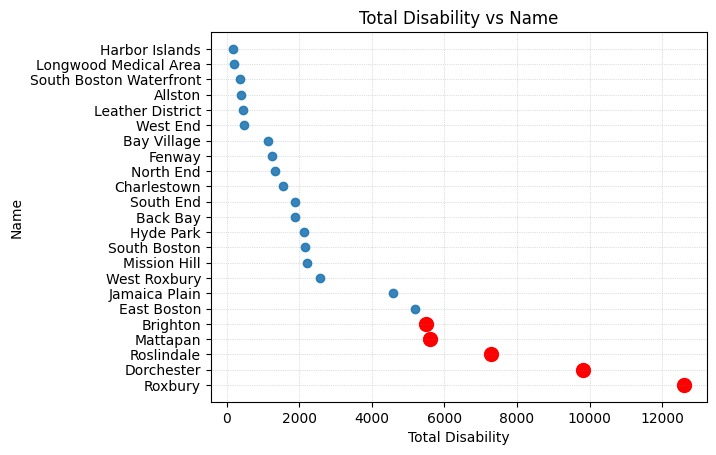

In [125]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Disability', ascending=False)

plt.scatter(combined_df_sorted['Total Disability'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Disability'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Disability')
plt.ylabel('Name')
plt.title('Total Disability vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


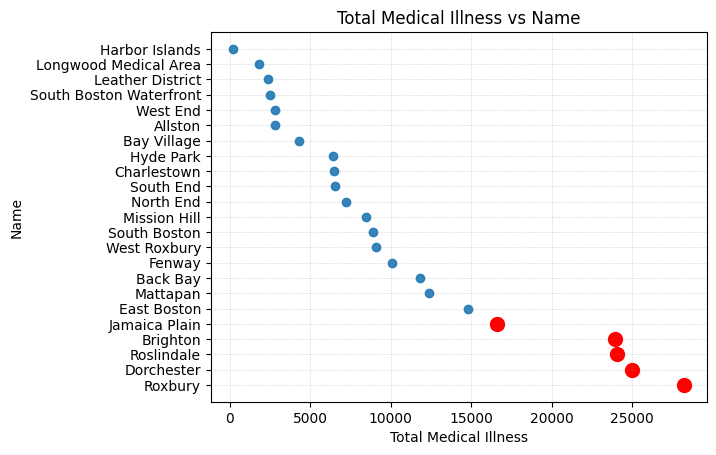

In [126]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Medical Illness', ascending=False)

plt.scatter(combined_df_sorted['Total Medical Illness'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Medical Illness'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Medical Illness')
plt.ylabel('Name')
plt.title('Total Medical Illness vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


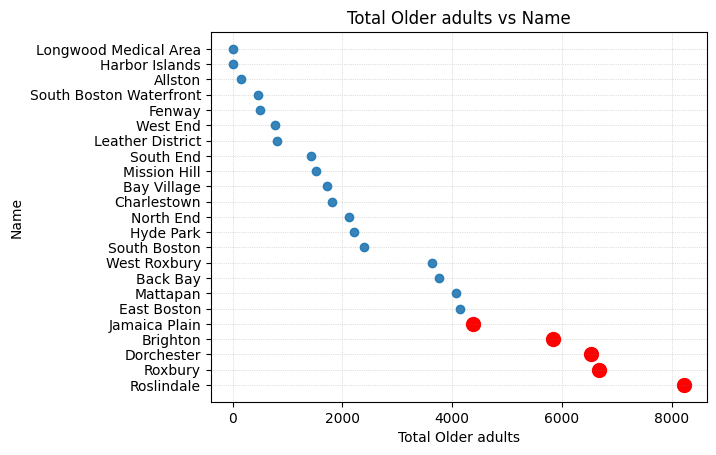

In [127]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Older adults', ascending=False)

plt.scatter(combined_df_sorted['Total Older adults'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Older adults'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Older adults')
plt.ylabel('Name')
plt.title('Total Older adults vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


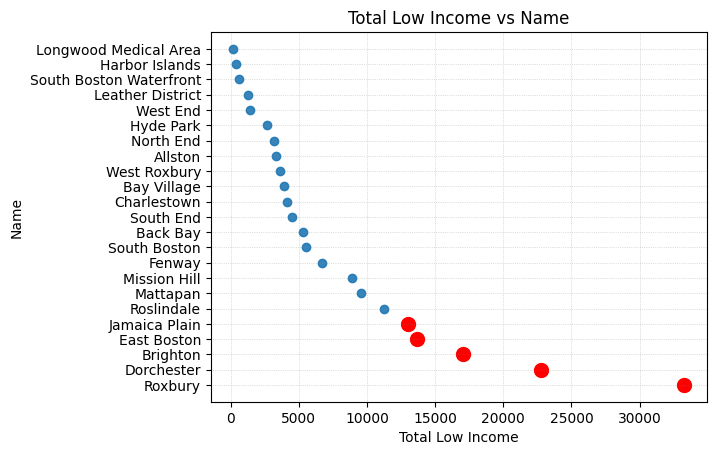

In [128]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Low Income', ascending=False)

plt.scatter(combined_df_sorted['Total Low Income'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Low Income'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Low Income')
plt.ylabel('Name')
plt.title('Total Low Income vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()
